Import necessary files

In [5]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Next we will load in the data and split it into train/test samples.

In [2]:
#load in data
data = pd.io.parsers.read_csv(
    'Data/Balanced.csv',
    header=None,
    skiprows = [0],
    usecols=[5,10,15,16,17,18,19,20,22]
    )



X = data.values[:,:8]

y = data.values[:,8]

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)



Now we standardise the data.

In [4]:
#standardisation using sklearn
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

With the data now standardised we can run PCA:

In [6]:
#Perform PCA on standardised variables
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

We have opted to generate two eigenvectors. Lets see how this looks.

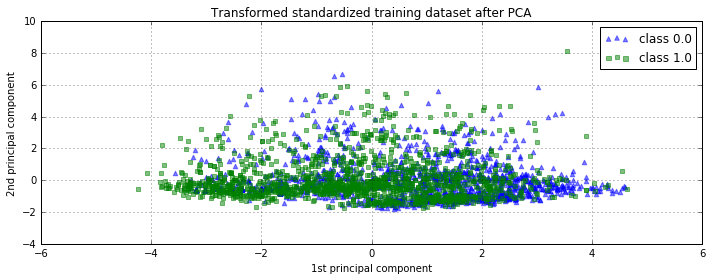

In [7]:
fig, ax2 = plt.subplots(figsize=(10,4))


for l,c,m in zip(np.unique(y_train), ('blue', 'green', 'red'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
    color=c,
    label='class %s' %l,
    alpha=0.5,
    marker=m
    )
   
ax2.set_title('Transformed standardized training dataset after PCA')    


ax2.set_xlabel('1st principal component')
ax2.set_ylabel('2nd principal component')
ax2.legend(loc='upper right')
ax2.grid()
plt.tight_layout()

plt.show()  

Fin.